## Verificare di utilizzare l'ambiente dove 'e installato pandas_datareder

In [2]:
import sys
sys.executable


'/home/antoiovi/anaconda3/envs/Finantial/bin/python'

In [1]:
from pandas_datareader import data


/home/antoiovi/anaconda3/envs/Finantial/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [29]:
# Only get the adjusted close.
aapl = data.DataReader("FCA", 
                       start='2020-06-1', 
                       end='2020-06-30', 
                       data_source='yahoo')['Adj Close']

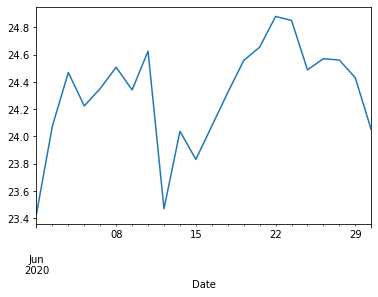

In [13]:
aapl.plot()

In [ ]:
# Only get the adjusted close.
ispy = data.DataReader("ISPY", 
                       start='2019-1-1', 
                       end='2019-12-31', 
                       data_source='yahoo')['Adj Close']

Installato yfinance
    
    ~$ source activate Finantial
    
    pip install yfinance --upgrade --no-cache-dir

In [14]:
import yfinance as yf

In [42]:
msft = yf.Ticker("XCHA.MI")
xcha = msft.history(period="max")

In [43]:
xcha

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-08-13,6.18,6.20,6.13,6.13,53735,0,0
2012-08-14,6.14,6.15,6.10,6.13,2265,0,0
2012-08-16,6.05,6.06,6.05,6.00,1850,0,0
2012-08-17,6.03,6.03,6.01,6.00,12300,0,0
2012-08-20,6.00,6.03,6.00,5.97,4000,0,0
...,...,...,...,...,...,...,...
2020-06-23,11.53,11.60,11.53,11.57,29241,0,0
2020-06-24,11.56,11.59,11.48,11.51,20648,0,0
2020-06-25,11.46,11.55,11.44,11.51,61552,0,0


In [51]:
csuss = yf.Ticker("CSUSS.MI")
csuss = msft.history(period="max")
csuss.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-08-13,6.18,6.20,6.13,6.13,53735,0,0
2012-08-14,6.14,6.15,6.10,6.13,2265,0,0
2012-08-16,6.05,6.06,6.05,6.00,1850,0,0
2012-08-17,6.03,6.03,6.01,6.00,12300,0,0
2012-08-20,6.00,6.03,6.00,5.97,4000,0,0


In [35]:
msft = yf.Ticker("ISPY.MI")
ispy = msft.history(period="max")

In [36]:
ispy

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-11-17,9.03,9.06,9.00,9.03,922,0,0
2015-11-18,9.06,9.10,9.03,9.08,6024,0,0
2015-11-19,9.18,9.19,9.11,9.12,75169,0,0
2015-11-20,9.22,9.27,9.19,9.25,34241,0,0
2015-11-23,9.29,9.51,9.22,9.28,22645,0,0
...,...,...,...,...,...,...,...
2020-06-23,16.80,16.96,16.75,16.87,190197,0,0
2020-06-24,16.90,16.90,16.34,16.39,84246,0,0
2020-06-25,16.50,16.62,16.27,16.57,56479,0,0


In [53]:
df=ispy
df['MM20']=df['Open'].rolling(window=20).mean()
df['MM5']=df['Open'].rolling(window=5).mean()
df['MM13']=df['Open'].rolling(window=13).mean()
df['MM50']=df['Open'].rolling(window=50).mean()


import math
import numpy as np
credito=0
lastbuy=0
guadagno=0
def buy(row):
    global credito,lastbuy,buyed
    print('{} buy  {} '.format(row.name,row['Close']))
    credito=credito+1
    lastbuy=row['Close']
    buyed.append(lastbuy)
def sell(row):
    global credito,lastbuy,guadagno
    g=(row['Close']-lastbuy)
    guadagno=guadagno+g
    print('{} sell  {} Guadagno {} '.format(row.name,row['Close'],g))
    credito=credito-1
    
buyed=[]

mm13=0
mm50=None
stato='START'
#Posizione media veloce (per indicare l'entry point)
POSIZONE_MV='START'
BUY=False
for index, row in df.iterrows():
    #print('mm13 :{} mm50 {} stato {}'.format(mm13,mm50,stato))
    if stato== 'START':
        #print(stato)
        mm50=row['MM50']
        mm13=row['MM13']
        if (math.isnan(mm50)|math.isnan(mm13)):
            stato=='START'
        else:
            stato='NULLO' 
            if mm13>mm50:
                POSIZONE_MV='SOPRA' 
            else :
                POSIZONE_MV='SOTTO'
    elif stato=='NULLO':
        #print(stato)
        if row['MM13']>row['MM50']:
            # Se Media veloce SORPASSA media lenta
            if POSIZONE_MV=='SOTTO':
                buy(row)
                stato='BUY'
            POSIZONE_MV='SOPRA'
        elif row['MM13']<row['MM50']:
            POSIZONE_MV='SOTTO'
            if stato== 'BUY':
                sell(row) 
                stato='NULLO'
        mm50=row['MM50']
        mm13=row['MM13']
    elif stato == 'BUY':
        #print(stato)
        if row['MM13']<row['MM50']:
            sell(row) 
            stato='NULLO'
            POSIZONE_MV='SOTTO'
        mm50=row['MM50']
        mm13=row['MM13']
last=df.iloc[-1][2]
prezzomedio=np.mean(buyed)
perc=100*guadagno/prezzomedio
print('Credito {:0.2f},  Guadagno {:0.2f} Prezzo medio : {:0.2f} Perc. {:0.2f}  '.format((credito*last),guadagno,prezzomedio,perc))


2016-03-14 00:00:00 buy  7.6 
2016-05-09 00:00:00 sell  7.22 Guadagno -0.3799999999999999 
2016-05-30 00:00:00 buy  7.91 
2016-10-25 00:00:00 sell  8.8 Guadagno 0.8900000000000006 
2016-11-18 00:00:00 buy  9.45 
2017-04-27 00:00:00 sell  9.94 Guadagno 0.4900000000000002 
2017-05-24 00:00:00 buy  10.02 
2017-05-29 00:00:00 sell  10.06 Guadagno 0.040000000000000924 
2017-06-07 00:00:00 buy  10.23 
2017-06-28 00:00:00 sell  9.87 Guadagno -0.3600000000000012 
2017-09-26 00:00:00 buy  9.31 
2018-02-09 00:00:00 sell  9.63 Guadagno 0.3200000000000003 
2018-02-23 00:00:00 buy  10.46 
2018-07-10 00:00:00 sell  12.17 Guadagno 1.709999999999999 
2018-07-17 00:00:00 buy  12.51 
2018-08-07 00:00:00 sell  12.23 Guadagno -0.27999999999999936 
2018-08-22 00:00:00 buy  12.4 
2018-10-11 00:00:00 sell  11.65 Guadagno -0.75 
2018-12-12 00:00:00 buy  12.28 
2018-12-20 00:00:00 sell  11.01 Guadagno -1.2699999999999996 
2019-01-25 00:00:00 buy  12.23 
2019-05-28 00:00:00 sell  13.94 Guadagno 1.70999999999999